<a href="https://colab.research.google.com/github/jayshivankar/Decision-Tree-Model/blob/main/Simple_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data File - https://drive.google.com/file/d/1b3ZtbqWw0knl7yJKHrHYuflLpJewHfM6/view?usp=drive_link

# Data Dictionary
    # 1. age (numeric).
    # 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
    # 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
    # 4. education (categorical: "unknown","secondary","primary","tertiary").
    # 5. default: has credit in default? (binary: "yes","no").
    # 6. balance: average yearly balance, in euros (numeric) .
    # 7. housing: has housing loan? (binary: "yes","no").
    # 8. loan: has personal loan? (binary: "yes","no")

    # Related with the last contact of the current campaign:
    # 9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
    # 10. day: last contact day of the month (numeric).
    # 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
    # 12. duration: last contact duration, in seconds (numeric).
    # 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
    # 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
    # 15. previous: number of contacts performed before this campaign and for this client (numeric).
    # 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

    -- ** TARGET ** --
    # 17. deposit - has the client subscribed a term deposit? (binary: "yes","no")./


In [ ]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score

# ignore warnigns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/bank.csv')
data.shape

(11162, 17)

In [ ]:
# data sample
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


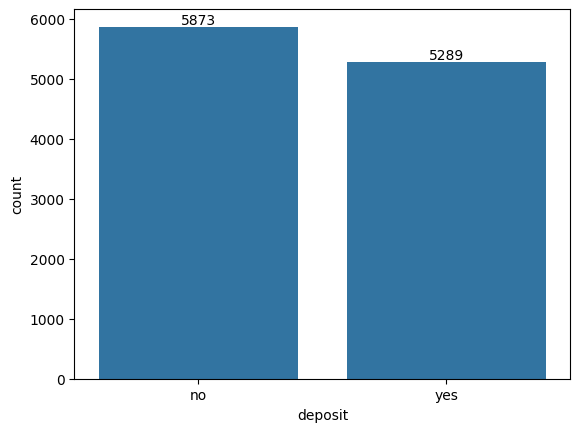

,proportion
deposit,
no,52.62
yes,47.38


In [ ]:
# analyse the target column
ax = sns.countplot(x='deposit', data=data, order=data['deposit'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

# proportion check
round(data['deposit'].value_counts(normalize=True)*100, 2)

In [ ]:
# null value check
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# data type
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
# number of unique classes in each columns
for cols in data.columns:
    if data[cols].dtype == "O":
        print(cols, ':', data[cols].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
deposit : 2


# Preparing the data for ML Models

In [ ]:
# dependency split
x = data.drop('deposit', axis=1)
y = data[['deposit']]

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# dimension of the split
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7813, 16) (7813, 1)
(3349, 16) (3349, 1)


In [ ]:
# list of cat cols
cat_cols = [cols for cols in x_train.columns if x_train[cols].dtype == 'O']

# Label encoder
encoders = {}

# apply encoder for train data
for col in cat_cols:
    encoders[col] = LabelEncoder()
    x_train[col] = encoders[col].fit_transform(x_train[col])

# apply encoder for test data
for col in cat_cols:
    x_test[col] = encoders[col].transform(x_test[col])

In [ ]:
# data sample after encoding
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7968,57,9,1,1,0,950,1,0,0,9,5,1272,1,-1,0,3
1456,34,9,2,2,0,925,1,0,0,13,0,709,1,-1,0,3
361,41,1,2,1,0,75,1,0,2,1,5,479,9,-1,0,3
812,46,9,2,2,0,4414,0,0,0,18,1,504,7,-1,0,3
1092,28,11,2,1,0,4465,0,0,0,28,4,769,1,-1,0,3


In [ ]:
# No need to scale the data because the decision tree uses GINI Index for comparision of columns
    # range of GINI Index is always between 0 and 1 for any columns with any scale / unit

In [ ]:
# Building a simple decision tree with random parameter values
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(x_train, y_train)                                 # model training
train_score = model.score(x_train, y_train)
print('Training Score:', round(train_score*100, 2), '%')

Training Score: 83.69 %


In [ ]:
# test prediction
y_pred = model.predict(x_test)

# testing accuracy
test_score = accuracy_score(y_test, y_pred)
print('Testing Score:', round(test_score*100, 2), '%')
print('Recall Score:', round(recall_score(y_test, y_pred, pos_label='yes')*100, 2), '%')
print('Precision Score:', round(precision_score(y_test, y_pred, pos_label='yes')*100, 2), '%')

Testing Score: 81.55 %
Recall Score: 76.23 %
Precision Score: 83.85 %


              precision    recall  f1-score   support

          no       0.79      0.79      0.79      1742
         yes       0.77      0.77      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



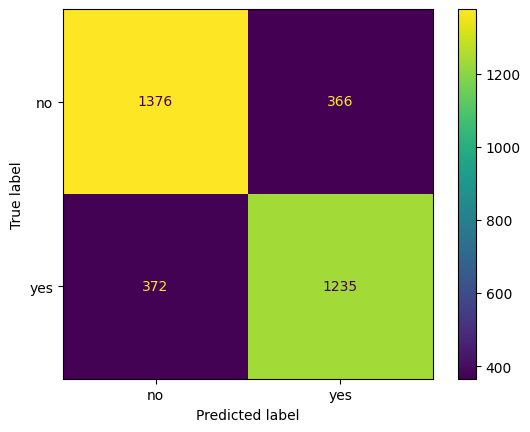

In [ ]:
# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))